### 39. Methodenseminar
## Big Data Module II: Introduction to Social Network Science with Python
# 3.2 Scale-Free Networks (Demo)
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Date**: 17 July 2019

**Library versions**: ``networkx`` 2.2 ([documentation](https://networkx.github.io/documentation/))

***
## Table of Contents
#### [3.2.1 Fitting Degree Distributions](#3_2_1)
#### [3.2.2 Alternative Distributions](#3_2_2)
#### [3.2.3 Plausibility of Power Law Fit](#3_2_3)
#### [3.2.4 Citation In Social Network Science](#3_2_4)
[3.2.4.1 Fitting the Citation Distribution](#3_2_4_1) |
[3.2.4.1 Measuring Preferential Attachment](#3_2_4_2)
***

## 3.2.1 Fitting Degree Distributions <a name='3_2_1'></a>

#### Erdős-Rényi Graph At Phase Transition

In [1]:
import networkx as nx

In [2]:
ER = nx.gnm_random_graph(n=100000, m=50000)

In [3]:
degree_er = [degree for (node, degree) in ER.degree if degree > 0]

In [4]:
import powerlaw as pl

In [5]:
fit_er = pl.Fit(degree_er, discrete=True, xmin=1) # explore setting xmin=None

C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


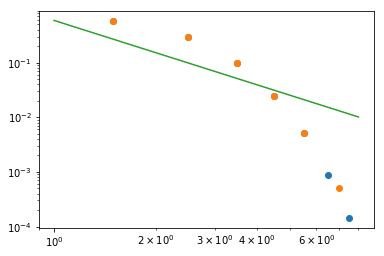

In [7]:
fit_er.plot_pdf(marker='o', ls='', linear_bins=True)
fit_er.plot_pdf(marker='o', ls='', linear_bins=False)
fit_er.power_law.plot_pdf()

Lower bound of fitted power law:

In [8]:
fit_er.xmin

1.0

Exponent of fitted power law:

In [9]:
fit_er.power_law.alpha

1.956780280385081

Kolmogorov-Smirnov goodness of fit:

In [10]:
fit_er.power_law.KS()

0.15550026212396706

#### Barabási–Albert Model From Preferential Attachment

In [11]:
BA = nx.barabasi_albert_graph(n=100000, m=1, seed=0)

In [12]:
degree_ba = [degree for (node, degree) in BA.degree]

In [13]:
fit_ba = pl.Fit(degree_ba, discrete=True, xmin=None) # explore setting xmin=None

Calculating best minimal value for power law fit


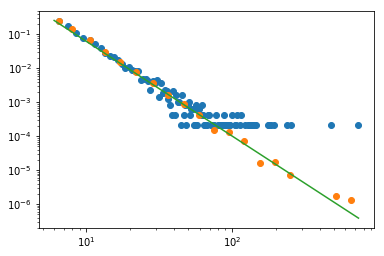

In [14]:
fit_ba.plot_pdf(marker='o', ls='', linear_bins=True)
fit_ba.plot_pdf(marker='o', ls='', linear_bins=False)
fit_ba.power_law.plot_pdf()

In [15]:
fit_ba.xmin

6.0

In [16]:
fit_ba.power_law.alpha

2.7848890811948186

In [17]:
fit_ba.power_law.KS()

0.006595381245030674

#### Estimation of Lower Cutoff

In [18]:
cutoff = []
for i in range (1, 21):
    cutoff.append(pl.Fit(degree_ba, discrete=True, xmin=i).power_law.KS())
cutoff[:3]

[0.0958353000405956, 0.028906706911883684, 0.01675281092834191]

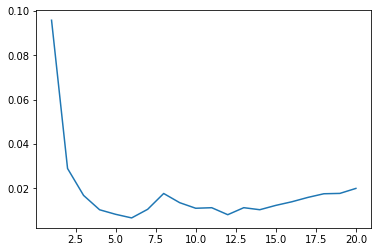

In [19]:
plt.plot(range (1, 21), cutoff)

### 3.2.2 Alternative Distributions <a name='3_2_2'></a>

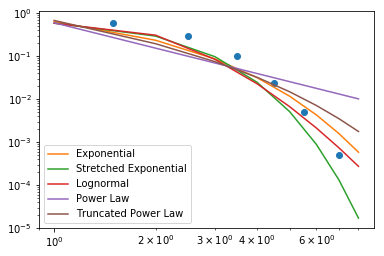

In [20]:
fit_er.plot_pdf(marker='o', ls='')
fit_er.exponential.plot_pdf(label='Exponential')
fit_er.stretched_exponential.plot_pdf(label='Stretched Exponential')
fit_er.lognormal_positive.plot_pdf(label='Lognormal')
fit_er.power_law.plot_pdf(label='Power Law')
fit_er.truncated_power_law.plot_pdf(label='Truncated Power Law')
plt.legend()

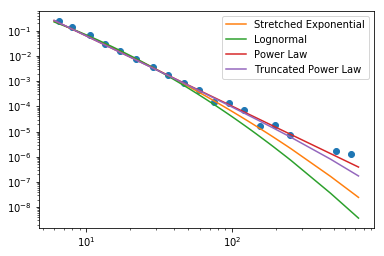

In [21]:
fit_ba.plot_pdf(marker='o', ls='')
#fit_ba.exponential.plot_pdf(label='Exponential')
fit_ba.stretched_exponential.plot_pdf(label='Stretched Exponential')
fit_ba.lognormal_positive.plot_pdf(label='Lognormal')
fit_ba.power_law.plot_pdf(label='Power Law')
fit_ba.truncated_power_law.plot_pdf(label='Truncated Power Law')
plt.legend()

#### Identifying the Best Fit

The first output is the log-likelihood ratio. If it is negative, the first function is less likely. The second output is the statistical significance of the comparison (whether or not the sign is interpretable).

In [22]:
fit_er.distribution_compare('power_law', 'exponential')

(-10694.205627995865, 0.0)

In [23]:
fit_ba.distribution_compare('power_law', 'exponential')

C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(963.1097191123781, 3.178290700417539e-12)

In [24]:
def compare_functions(f):
    function = ['exponential', 'stretched_exponential', 'lognormal', 'lognormal_positive', 'power_law', 'truncated_power_law']
    from numpy import zeros
    f_compare_R = zeros((6, 6), dtype=float)
    f_compare_p_R = zeros((6, 6), dtype=float)
    for i in range(0, 6):
        for j in range(0, 6):
            R, p_R = f.distribution_compare(function[i], function[j])
            f_compare_R[i, j] = R
            f_compare_p_R[i, j] = p_R
    from pandas import DataFrame
    return DataFrame(f_compare_R, index=function, columns=function), DataFrame(f_compare_p_R, index=function, columns=function)

In [25]:
r_er, p_er = compare_functions(fit_er)

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


In [26]:
r_er

,exponential,stretched_exponential,lognormal,lognormal_positive,power_law,truncated_power_law
exponential,0.000000,-1041.347876,-846.003173,-846.003173,10694.205628,1897.444886
stretched_exponential,1041.347876,0.000000,195.344703,195.344703,11735.553504,2938.792763
lognormal,846.003173,-195.344703,0.000000,0.000000,11540.208801,2743.448059
lognormal_positive,846.003173,-195.344703,0.000000,0.000000,11540.208801,2743.448059
power_law,-10694.205628,-11735.553504,-11540.208801,-11540.208801,0.000000,-8796.760742
truncated_power_law,-1897.444886,-2938.792763,-2743.448059,-2743.448059,8796.760742,0.000000


In [27]:
p_er

,exponential,stretched_exponential,lognormal,lognormal_positive,power_law,truncated_power_law
exponential,1.000000e+00,0.000000e+00,3.884648e-83,3.884648e-83,0.0,0.0
stretched_exponential,0.000000e+00,1.000000e+00,8.428966e-32,8.428966e-32,0.0,0.0
lognormal,3.884648e-83,8.428966e-32,1.000000e+00,1.000000e+00,0.0,0.0
lognormal_positive,3.884648e-83,8.428966e-32,1.000000e+00,1.000000e+00,0.0,0.0
power_law,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
truncated_power_law,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.0


In [28]:
r_ba, p_ba = compare_functions(fit_ba)

Assuming nested distributions
Assuming nested distributions
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


In [29]:
r_ba

,exponential,stretched_exponential,lognormal,lognormal_positive,power_law,truncated_power_law
exponential,0.000000,-953.237307,-964.406213,-919.871392,-963.109719,-964.043487
stretched_exponential,953.237307,0.000000,-11.168906,33.365915,-9.872412,-10.806180
lognormal,964.406213,11.168906,0.000000,44.534821,1.296494,0.362726
lognormal_positive,919.871392,-33.365915,-44.534821,0.000000,-43.238327,-44.172096
power_law,963.109719,9.872412,-1.296494,43.238327,0.000000,-0.933768
truncated_power_law,964.043487,10.806180,-0.362726,44.172096,0.933768,0.000000


In [30]:
p_ba

,exponential,stretched_exponential,lognormal,lognormal_positive,power_law,truncated_power_law
exponential,1.000000e+00,0.000000e+00,1.822871e-12,6.403812e-13,3.178291e-12,1.978188e-12
stretched_exponential,0.000000e+00,1.000000e+00,3.095499e-02,1.343980e-08,1.335211e-01,5.705178e-02
lognormal,1.822871e-12,3.095499e-02,1.000000e+00,0.000000e+00,4.103507e-01,6.191056e-01
lognormal_positive,6.403812e-13,1.343980e-08,0.000000e+00,1.000000e+00,4.879640e-04,1.208556e-04
power_law,3.178291e-12,1.335211e-01,4.103507e-01,4.879640e-04,1.000000e+00,1.717575e-01
truncated_power_law,1.978188e-12,5.705178e-02,6.191056e-01,1.208556e-04,1.717575e-01,1.000000e+00


### 3.2.3 Plausibility of Power Law Fit <a name='3_2_3'></a>

In [31]:
def p_value(f, sims=2500):
    prob = f.n_tail/len(f.data_original)
    body = [x for x in f.data_original if x < f.xmin]
    l = []
    from random import random, sample
    from powerlaw import Fit, Power_Law
    for i in range(0, sims):
        x = []
        for j in range(0, len(f.data_original)):
            if random() <= prob:
                x.append(int(Power_Law(discrete=True, xmin=f.xmin, parameters=[f.power_law.alpha]).generate_random(1)))
            else:
                x.append(sample(body, 1)[0])
        x_fit = Fit(x, discrete=True).power_law
        l.append(x_fit.KS() > f.power_law.KS())
    p = sum(l)/sims
    return p

In [32]:
p_value(fit_er, sims=10)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.0

In [33]:
p_value(fit_ba, sims=10)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.9

### 3.2.4 Citation In Social Network Science <a name='3_2_4'></a>

In [34]:
import pandas as pd

In [35]:
citations = pd.read_csv('../data/sns/citations.txt', header='infer', delimiter='\t', encoding='utf-8')
references = pd.read_csv('../data/sns/references.txt', header='infer', delimiter='\t', encoding='utf-8')
cited_references = pd.merge(left=citations, right=references, on='reference_id')
cited_references = cited_references.groupby('reference').size().reset_index(name='citations')
cited_references = cited_references.sort_values('citations', ascending=False)
cited_references.head()

,reference,citations
541166,WASSERMA_1994_SOCIAL,2474
204484,GRANOVET_1973_A_1360,2387
77491,BURT_1992_STRUCTURAL,1407
542155,WATTS_1998_N_440,1335
31572,BARABASI_1999_S_509,1197


#### 3.2.4.1 Fitting the Citation Distribution <a name='3_2_4_1'></a>

In [36]:
c = list(cited_references['citations'])

In [37]:
fit_c = pl.Fit(c, discrete=True, xmin=None)

Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


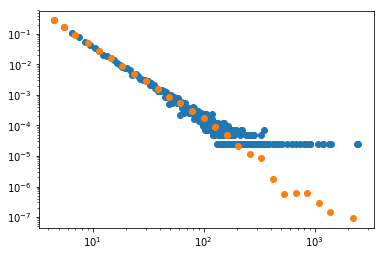

In [38]:
fit_c.plot_pdf(marker='o', ls='', linear_bins=True)
fit_c.plot_pdf(marker='o', ls='', linear_bins=False)
#fit_c.power_law.plot_pdf(label='Power Law')
#fit_c.truncated_power_law.plot_pdf(label='Truncated Power Law')
#plt.legend()

In [39]:
fit_c.xmin

4.0

In [40]:
fit_c.power_law.alpha

2.3018575306117692

In [41]:
fit_c.truncated_power_law.alpha

2.277754698947841

In [42]:
compare_functions(fit_c)

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


(                        exponential  stretched_exponential     lognormal  \
 exponential                0.000000           -2180.764442 -14721.142257   
 stretched_exponential   2180.764442               0.000000 -12540.377815   
 lognormal              14721.142257           12540.377815      0.000000   
 lognormal_positive     14117.351982           11936.587540   -603.790275   
 power_law              14686.679893           12505.915451    -34.462363   
 truncated_power_law    14726.330254           12545.565813      5.187998   
 
                        lognormal_positive     power_law  truncated_power_law  
 exponential                 -14117.351982 -14686.679893        -14726.330254  
 stretched_exponential       -11936.587540 -12505.915451        -12545.565813  
 lognormal                      603.790275     34.462363            -5.187998  
 lognormal_positive               0.000000   -569.327911          -608.978272  
 power_law                      569.327911      0.000000   

In [43]:
p_value(fit_c, sims=10)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0.9

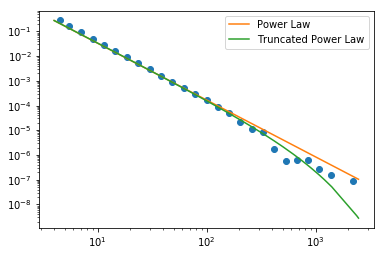

In [44]:
fit_c.plot_pdf(marker='o', ls='', linear_bins=False)
fit_c.power_law.plot_pdf(label='Power Law')
fit_c.truncated_power_law.plot_pdf(label='Truncated Power Law')
plt.legend()

#### 3.2.4.1 Measuring Preferential Attachment <a name='3_2_4_1'></a>

In [45]:
import numpy as np

In [46]:
citations = pd.read_csv('../data/sns/citations.txt', header='infer', delimiter='\t', encoding='utf-8')
references = pd.read_csv('../data/sns/references.txt', header='infer', delimiter='\t', encoding='utf-8')
cited_references = pd.merge(left=citations, right=references, on='reference_id')
publications = pd.read_csv('../data/sns/publications.txt', header='infer', delimiter='\t', encoding='utf-8')
publications['time'] = (3*np.floor(publications['time']/3)+2).astype('int')
cited_references_time = pd.merge(left=cited_references, right=publications[['publication_id', 'time']], on='publication_id')
cited_references_time = cited_references_time.groupby(['time', 'reference']).size().reset_index(name='citations')
cited_references_time.head()

,time,reference,citations
0,1925,BENTHAM_1869_COMMUNICATION,1
1,1925,FISHER_1922_J_87,1
2,1925,FISHER_1992_P_309,1
3,1925,HOLMES_1913_AGE,1
4,1928,FOCK_1924_M_161,1


In [47]:
years = list(cited_references_time['time'].drop_duplicates())
years[-13:]

[1976, 1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012]

In [48]:
len(years)

28

In [49]:
t = 27
cited_references_t_0 = cited_references_time[cited_references_time['time'] == years[t-1]]
cited_references_t = cited_references_time[cited_references_time['time'] == years[t]]
preferential_attachment = pd.merge(left=cited_references_t_0, right=cited_references_t, on='reference')
preferential_attachment.columns = ['time_0', 'reference', 'citations_0', 'time', 'citations']
preferential_attachment = preferential_attachment[['time_0', 'time', 'reference', 'citations_0', 'citations']]
preferential_attachment.head()

,time_0,time,reference,citations_0,citations
0,2009,2012,AABY_1989_I_7,1,1
1,2009,2012,AAKER_1990_J_27,1,4
2,2009,2012,AAKER_1991_MANAGING,2,1
3,2009,2012,AAKER_1996_BUILDING,2,2
4,2009,2012,AAKER_1997_J_347,1,2


In [50]:
a = np.column_stack((preferential_attachment['citations_0'], preferential_attachment['citations']))

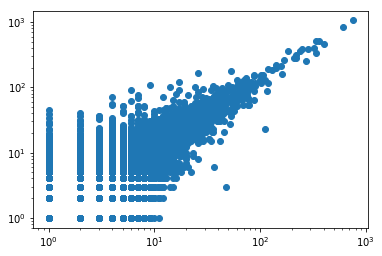

In [51]:
plt.scatter(a[:, 0], a[:, 1])
plt.xscale('log')
plt.yscale('log')

#### Fitting A Scaling Law

In [52]:
def ols_reg(a):
    # log and reshape data
    x_log10 = np.log10(a[:, 0])
    x_log10_reshape = x_log10.reshape(len(x_log10), 1)
    y_log10 = np.log10(a[:, 1])
    y_log10_reshape = y_log10.reshape(len(y_log10), 1)
    # fit linear model in log space
    import sklearn.linear_model as sk_lm
    reg = sk_lm.LinearRegression()
    reg.fit(x_log10_reshape, y_log10_reshape)
    y_log10_reshape_predict = reg.predict(x_log10_reshape)
    # create output
    x_min = min(a[:, 0])
    x_max = max(a[:, 0])
    d = 10**reg.intercept_[0]
    beta = reg.coef_[0][0]
    from sklearn.metrics import r2_score
    r2 = r2_score(y_log10_reshape, y_log10_reshape_predict)
    a_fit = np.array([[x_min, d*x_min**beta], [x_max, d*x_max**beta]])
    return beta, r2, a_fit

In [53]:
beta, r2, a_fit = ols_reg(a)
beta, r2

(0.7837925346811114, 0.47017372756740017)

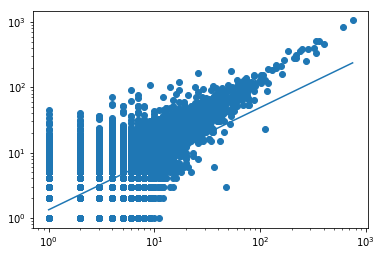

In [54]:
plt.scatter(a[:, 0], a[:, 1])
plt.plot(a_fit[:, 0], a_fit[:, 1])
plt.xscale('log')
plt.yscale('log')

#### Fitting A Scaling Law On Averaged Data

In [57]:
a_mean = pd.DataFrame(a).groupby(0).mean().reset_index().values

In [58]:
beta_mean, r2_mean, a_fit_mean = ols_reg(a_mean)
beta_mean, r2_mean

(1.0063572926094517, 0.9694299648104099)

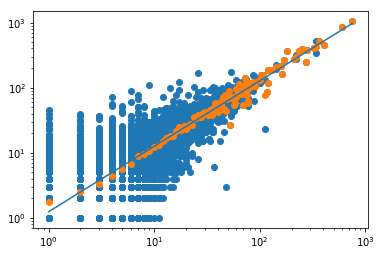

In [59]:
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(a_mean[:, 0], a_mean[:, 1])
plt.plot(a_fit_mean[:, 0], a_fit_mean[:, 1])
plt.xscale('log')
plt.yscale('log')